# Crude Oil Production Analysis

## Introduction

Crude oil production is a critical component of the global energy market and has significant implications for economies and industries worldwide. This project aims to analyze crude oil production data to uncover trends, patterns, and insights that can inform decision-making in the energy sector.

### Objectives
- **Data Collection**: Gather historical crude oil production data from reliable sources.
- **Data Cleaning**: Process the data to handle missing values and inconsistencies.
- **Exploratory Data Analysis (EDA)**: Use statistical methods and visualizations to explore the data.
- **Trend Analysis**: Identify and analyze long-term trends in crude oil production.
- **Predictive Modeling**: Build models to forecast future production levels.

### Dataset
The dataset used in this project includes:
- Historical crude oil production data of Volve field.

### Tools and Technologies
- **Python**: Programming language used for data analysis and modeling.
- **Pandas**: Library for data manipulation and analysis.
- **Plotly.JS**: Libraries for data visualization.
- **Scikit-learn**: Machine learning library for predictive modeling.
- **Optuna**: A hyperparameter optimization framework for faster model optimization.


### Structure of the Notebook
1. **Data Collection and Cleaning**: Steps to gather and preprocess the data.
2. **Exploratory Data Analysis**: Visualizations and statistical analysis of the data.
3. **Trend Analysis**: Examination of production trends over time.
4. **Predictive Modeling**: Development and evaluation of predictive models.
5. **Conclusions and Insights**: Key findings and their implications for the industry.

By the end of this project, we aim to provide a comprehensive analysis of crude oil production trends and deliver actionable insights that can help stakeholders in making informed decisions.


## Data Dictionary

| Column                  | Description                                                     |
|-------------------------|-----------------------------------------------------------------|
| DATEPRD                 | The date of the production data entry                           |
| WELL_BORE_CODE          | A unique identifier for the well bore                           |
| NPD_WELL_BORE_CODE      | The Norwegian Petroleum Directorate (NPD) specific code for the well bore |
| NPD_WELL_BORE_NAME      | The name of the well bore as per the NPD                        |
| NPD_FIELD_CODE          | The NPD code for the oil field                                  |
| NPD_FIELD_NAME          | The name of the oil field as per the NPD                        |
| NPD_FACILITY_CODE       | The NPD code for the facility                                   |
| NPD_FACILITY_NAME       | The name of the facility as per the NPD                         |
| ON_STREAM_HRS           | The number of hours the well was producing                      |
| AVG_DOWNHOLE_PRESSURE   | The average pressure measured downhole (in the wellbore)        |
| AVG_DOWNHOLE_TEMPERATURE| The average temperature measured downhole                       |
| AVG_DP_TUBING           | The average differential pressure in the tubing                 |
| AVG_ANNULUS_PRESS       | The average pressure in the annulus (the space between the wellbore and the tubing) |
| AVG_CHOKE_SIZE_P        | The average size of the production choke (controls flow rate)   |
| AVG_CHOKE_UOM           | The unit of measurement for the choke size                      |
| AVG_WHP_P               | The average wellhead pressure (pressure at the surface of the well) |
| AVG_WHT_P               | The average wellhead temperature                                |
| DP_CHOKE_SIZE           | The differential pressure across the choke                      |
| BORE_OIL_VOL            | The volume of oil produced                                      |
| BORE_GAS_VOL            | The volume of gas produced                                      |
| BORE_WAT_VOL            | The volume of water produced                                    |
| BORE_WI_VOL             | The volume of water injected                                    |
| FLOW_KIND               | The type of flow (e.g., production, injection)                  |
| WELL_TYPE               | The type of well (e.g., oil, gas, water injection)              |


## Importing libraries and getting started

In [450]:
import pandas as pd
import numpy as np

import plotly.express as px
import kaleido
import plotly.io as pio
pio.renderers.default = "png" # Remove line 5, 6, and 7 to make the visualizations interactive. :) 
# Rendering visualizations as png to make them visible in the notebook preview and to conserve notebook size.

from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

import joblib

seed = 0
np.random.seed(0)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [451]:
data = pd.read_excel('data/volve-field-daily-data.xlsx')

In [452]:
data.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0            0.0                0.00000                   0.00000   
1            0.0                    NaN                       NaN   
2            0.0                    NaN                       NaN   
3            0.0                    NaN                       NaN   
4            0.0              310.37614                  96.87589   

   AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
0        0.00000                0.0          0.000000             %   
1            NaN                0.0          1.003059             %   
2            NaN                0.0          0.979008             %   
3            NaN                0.0          0.545759             %   
4      277.27826                0.0          1.215987             %   

   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
0    0.00000    0.00000        0.00000           0.0           0.0   
1    0.00000    0.00000        0.00000           0.0           0.0   
2    0.00000    0.00000        0.00000           0.0           0.0   
3    0.00000    0.00000        0.00000           0.0           0.0   
4   33.09788   10.47992       33.07195           0.0           0.0   

   BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
0           0.0          NaN  production        WI  
1           0.0          NaN  production        OP  
2           0.0          NaN  production        OP  
3           0.0          NaN  production        OP  
4           0.0          NaN  production        OP

In [453]:
data.nunique()

DATEPRD                     3327
WELL_BORE_CODE                 7
NPD_WELL_BORE_CODE             7
NPD_WELL_BORE_NAME             7
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                925
AVG_DOWNHOLE_PRESSURE       6567
AVG_DOWNHOLE_TEMPERATURE    6461
AVG_DP_TUBING               8684
AVG_ANNULUS_PRESS           6644
AVG_CHOKE_SIZE_P            6419
AVG_CHOKE_UOM                  1
AVG_WHP_P                   8829
AVG_WHT_P                   8793
DP_CHOKE_SIZE               9057
BORE_OIL_VOL                7818
BORE_GAS_VOL                8005
BORE_WAT_VOL                7361
BORE_WI_VOL                 5258
FLOW_KIND                      2
WELL_TYPE                      2
dtype: int64

In [454]:
data.shape

(15634, 24)

In [455]:
data.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [456]:
data.isna().sum().sum() / (data.shape[0]*data.shape[1]) * 100

22.33033772547013

In [457]:
data.isna().mean().round(4) * 100

DATEPRD                      0.00
WELL_BORE_CODE               0.00
NPD_WELL_BORE_CODE           0.00
NPD_WELL_BORE_NAME           0.00
NPD_FIELD_CODE               0.00
NPD_FIELD_NAME               0.00
NPD_FACILITY_CODE            0.00
NPD_FACILITY_NAME            0.00
ON_STREAM_HRS                1.82
AVG_DOWNHOLE_PRESSURE       42.56
AVG_DOWNHOLE_TEMPERATURE    42.56
AVG_DP_TUBING               42.56
AVG_ANNULUS_PRESS           49.53
AVG_CHOKE_SIZE_P            42.95
AVG_CHOKE_UOM               41.40
AVG_WHP_P                   41.44
AVG_WHT_P                   41.50
DP_CHOKE_SIZE                1.88
BORE_OIL_VOL                41.40
BORE_GAS_VOL                41.40
BORE_WAT_VOL                41.40
BORE_WI_VOL                 63.50
FLOW_KIND                    0.00
WELL_TYPE                    0.00
dtype: float64

In [458]:
data.isna().sum().sum() / data.size * 100

22.33033772547013

22.33% of our data is NaN values. <br />
Percentage NaN values by columns is given below
| Column                      | Percentage |
|-----------------------------|------------|
| DATEPRD                     | 0.00       |
| WELL_BORE_CODE              | 0.00       |
| NPD_WELL_BORE_CODE          | 0.00       |
| NPD_WELL_BORE_NAME          | 0.00       |
| NPD_FIELD_CODE              | 0.00       |
| NPD_FIELD_NAME              | 0.00       |
| NPD_FACILITY_CODE           | 0.00       |
| NPD_FACILITY_NAME           | 0.00       |
| ON_STREAM_HRS               | 1.82       |
| AVG_DOWNHOLE_PRESSURE       | 42.56      |
| AVG_DOWNHOLE_TEMPERATURE    | 42.56      |
| AVG_DP_TUBING               | 42.56      |
| AVG_ANNULUS_PRESS           | 49.53      |
| AVG_CHOKE_SIZE_P            | 42.95      |
| AVG_CHOKE_UOM               | 41.40      |
| AVG_WHP_P                   | 41.44      |
| AVG_WHT_P                   | 41.50      |
| DP_CHOKE_SIZE               | 1.88       |
| BORE_OIL_VOL                | 41.40      |
| BORE_GAS_VOL                | 41.40      |
| BORE_WAT_VOL                | 41.40      |
| BORE_WI_VOL                 | 63.50      |
| FLOW_KIND                   | 0.00       |
| WELL_TYPE                   | 0.00       |


In [459]:
np.unique(data['NPD_WELL_BORE_CODE'])

array([5351, 5599, 5693, 5769, 7078, 7289, 7405], dtype=int64)

In [460]:
grouped_data = data.groupby('NPD_WELL_BORE_CODE')

In [461]:
dataframes = {well_bore_code : group for well_bore_code, group in grouped_data}

In [462]:
data_well1, data_well2, data_well3, data_well4, data_well5, data_well6, data_well7 = dataframes.values()

In [463]:
print(data_well1.shape, data_well2.shape, data_well3.shape, data_well4.shape, data_well5.shape, data_well6.shape, data_well7.shape)

(3056, 24) (3056, 24) (3327, 24) (3306, 24) (1165, 24) (978, 24) (746, 24)


## Analysis for well NO 15/9-F-14 H || 5351

In [464]:
data_well1.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
4967 2008-02-12  NO 15/9-F-14 H                5351          15/9-F-14   
4968 2008-02-13  NO 15/9-F-14 H                5351          15/9-F-14   
4969 2008-02-14  NO 15/9-F-14 H                5351          15/9-F-14   
4970 2008-02-15  NO 15/9-F-14 H                5351          15/9-F-14   
4971 2008-02-16  NO 15/9-F-14 H                5351          15/9-F-14   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
4967         3420717          VOLVE             369304    MÆRSK INSPIRER   
4968         3420717          VOLVE             369304    MÆRSK INSPIRER   
4969         3420717          VOLVE             369304    MÆRSK INSPIRER   
4970         3420717          VOLVE             369304    MÆRSK INSPIRER   
4971         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
4967            0.0                    0.0                       0.0   
4968            0.0                    0.0                       0.0   
4969            0.0                    0.0                       0.0   
4970            0.0                    0.0                       0.0   
4971            0.0                    0.0                       0.0   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
4967            0.0            0.00000               NaN             %   
4968            0.0            0.00000               NaN             %   
4969            0.0            0.00000               NaN             %   
4970            0.0            0.00006               NaN             %   
4971            0.0            0.00006               NaN             %   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
4967        0.0        0.0        0.05885           0.0           0.0   
4968        0.0        0.0        0.06768           0.0           0.0   
4969        0.0        0.0        0.04950           0.0           0.0   
4970        0.0        0.0        0.06640           0.0           0.0   
4971        0.0        0.0        0.10479           0.0           0.0   

      BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
4967           0.0          NaN  production        OP  
4968           0.0          NaN  production        OP  
4969           0.0          NaN  production        OP  
4970           0.0          NaN  production        OP  
4971           0.0          NaN  production        OP

In [465]:
print(data_well1.shape, data_well1.size)

(3056, 24) 73344


In [466]:
data_well1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3056 entries, 4967 to 8022
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3056 non-null   object        
 2   NPD_WELL_BORE_CODE        3056 non-null   int64         
 3   NPD_WELL_BORE_NAME        3056 non-null   object        
 4   NPD_FIELD_CODE            3056 non-null   int64         
 5   NPD_FIELD_NAME            3056 non-null   object        
 6   NPD_FACILITY_CODE         3056 non-null   int64         
 7   NPD_FACILITY_NAME         3056 non-null   object        
 8   ON_STREAM_HRS             3056 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 11  AVG_DP_TUBING             3050 non-null   float64       
 12  AVG_ANNULUS_PRESS     

In [467]:
data_well1.nunique()

DATEPRD                     3056
WELL_BORE_CODE                 1
NPD_WELL_BORE_CODE             1
NPD_WELL_BORE_NAME             1
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                280
AVG_DOWNHOLE_PRESSURE       2837
AVG_DOWNHOLE_TEMPERATURE    2733
AVG_DP_TUBING               2900
AVG_ANNULUS_PRESS           1482
AVG_CHOKE_SIZE_P            1672
AVG_CHOKE_UOM                  1
AVG_WHP_P                   2894
AVG_WHT_P                   2862
DP_CHOKE_SIZE               3041
BORE_OIL_VOL                2705
BORE_GAS_VOL                2723
BORE_WAT_VOL                2676
BORE_WI_VOL                    0
FLOW_KIND                      1
WELL_TYPE                      1
dtype: int64

In [468]:
data_well1.isna().mean().round(4) * 100

DATEPRD                       0.00
WELL_BORE_CODE                0.00
NPD_WELL_BORE_CODE            0.00
NPD_WELL_BORE_NAME            0.00
NPD_FIELD_CODE                0.00
NPD_FIELD_NAME                0.00
NPD_FACILITY_CODE             0.00
NPD_FACILITY_NAME             0.00
ON_STREAM_HRS                 0.00
AVG_DOWNHOLE_PRESSURE         0.20
AVG_DOWNHOLE_TEMPERATURE      0.20
AVG_DP_TUBING                 0.20
AVG_ANNULUS_PRESS            17.11
AVG_CHOKE_SIZE_P              6.41
AVG_CHOKE_UOM                 0.00
AVG_WHP_P                     0.00
AVG_WHT_P                     0.00
DP_CHOKE_SIZE                 0.00
BORE_OIL_VOL                  0.00
BORE_GAS_VOL                  0.00
BORE_WAT_VOL                  0.00
BORE_WI_VOL                 100.00
FLOW_KIND                     0.00
WELL_TYPE                     0.00
dtype: float64

In [469]:
round(data_well1.describe(include=['int64', 'float64']).T, 2)

count        mean        std         min  \
NPD_WELL_BORE_CODE        3056.0     5351.00       0.00     5351.00   
NPD_FIELD_CODE            3056.0  3420717.00       0.00  3420717.00   
NPD_FACILITY_CODE         3056.0   369304.00       0.00   369304.00   
ON_STREAM_HRS             3056.0       20.54       7.88        0.00   
AVG_DOWNHOLE_PRESSURE     3050.0      233.07      64.92        0.00   
AVG_DOWNHOLE_TEMPERATURE  3050.0       95.13      25.85        0.00   
AVG_DP_TUBING             3050.0      192.65      57.74        0.00   
AVG_ANNULUS_PRESS         2533.0       10.53       9.70        0.00   
AVG_CHOKE_SIZE_P          2860.0       69.39      31.06        0.00   
AVG_WHP_P                 3056.0       41.53      22.72        0.00   
AVG_WHT_P                 3056.0       77.10      25.62        0.00   
DP_CHOKE_SIZE             3056.0       15.44      19.97        0.00   
BORE_OIL_VOL              3056.0     1290.00    1298.36        0.00   
BORE_GAS_VOL              3056.0   189139.25  184204.11        0.00   
BORE_WAT_VOL              3056.0     2330.25    1462.93      -59.19   
BORE_WI_VOL                  0.0         NaN        NaN         NaN   

                                 25%         50%         75%         max  
NPD_WELL_BORE_CODE           5351.00     5351.00     5351.00     5351.00  
NPD_FIELD_CODE            3420717.00  3420717.00  3420717.00  3420717.00  
NPD_FACILITY_CODE          369304.00   369304.00   369304.00   369304.00  
ON_STREAM_HRS                  24.00       24.00       24.00       25.00  
AVG_DOWNHOLE_PRESSURE         237.49      246.78      261.97      334.66  
AVG_DOWNHOLE_TEMPERATURE       99.62      101.01      105.05      106.77  
AVG_DP_TUBING                 180.75      204.25      229.63      302.11  
AVG_ANNULUS_PRESS               0.00       12.97       21.23       26.68  
AVG_CHOKE_SIZE_P               43.01       71.01      100.00      100.00  
AVG_WHP_P                      31.02       33.55       49.08      125.72  
AVG_WHT_P                      81.22       86.96       88.54       93.51  
DP_CHOKE_SIZE                   2.67        7.18       21.17      125.72  
BORE_OIL_VOL                  209.86      880.78     2033.70     5644.37  
BORE_GAS_VOL                31304.04   142362.86   305327.86   789974.73  
BORE_WAT_VOL                  695.59     2965.72     3444.15     5691.77  
BORE_WI_VOL                      NaN         NaN         NaN         NaN

In [470]:
color_dict = {
    'BORE_OIL_VOL': 'forestgreen',
    'BORE_GAS_VOL': 'red',
    'BORE_WAT_VOL': 'royalblue'
}

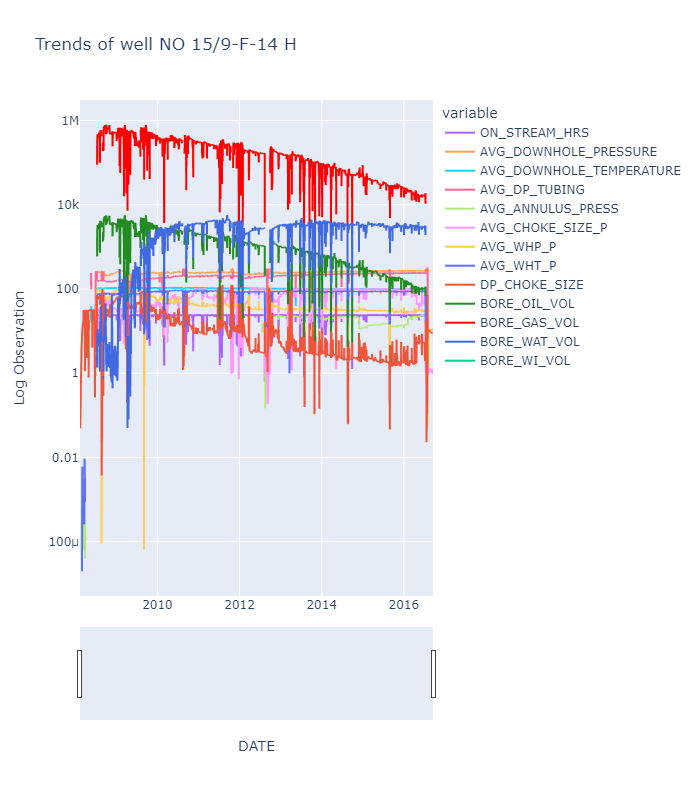

In [471]:
y = data_well1.select_dtypes(exclude='object').columns
y
fig = px.line(data_well1, 
              x = 'DATEPRD', 
              y = y[4:], 
              log_y=True, 
              title = 'Trends of well NO 15/9-F-14 H',
              height = 800,
              color_discrete_map=color_dict
              )
fig.update_layout(xaxis_title = 'DATE', yaxis_title = 'Log Observation')
fig.update_xaxes(rangeslider_visible = True)

fig.show()

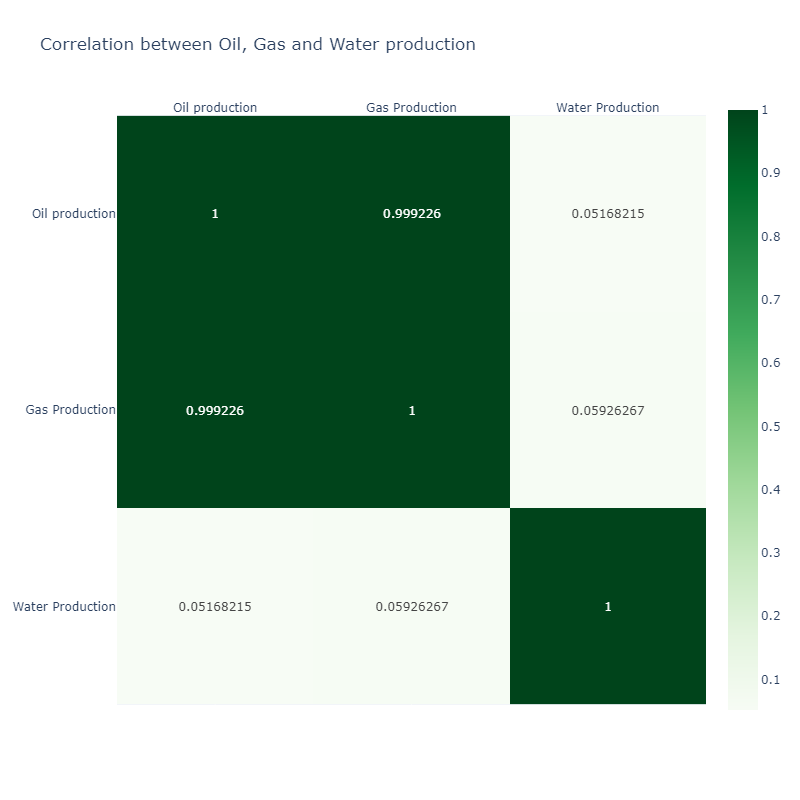

In [472]:
fig = px.imshow(data_well1[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']].corr(method='spearman'),
                text_auto=True,
                color_continuous_scale=px.colors.sequential.Greens,
                x=['Oil production', 'Gas Production', 'Water Production'],
                y=['Oil production', 'Gas Production', 'Water Production'],
                height = 800,
                width = 800,
                title = 'Correlation between Oil, Gas and Water production'
)
fig.update_xaxes(side = 'top')
fig.show()

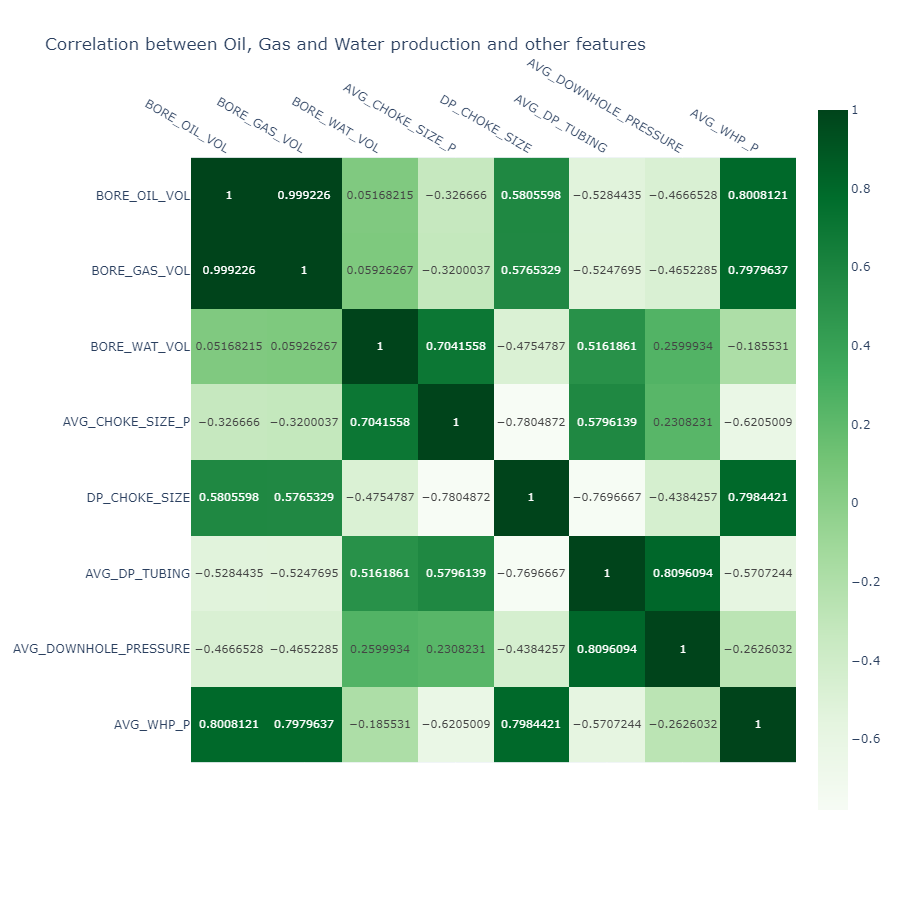

In [473]:
fig = px.imshow(data_well1[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_CHOKE_SIZE_P', 'DP_CHOKE_SIZE', 'AVG_DP_TUBING', 'AVG_DOWNHOLE_PRESSURE', 'AVG_WHP_P']].corr(method='spearman'),
                text_auto=True,
                color_continuous_scale=px.colors.sequential.Greens,
                # x=['Oil production', 'Gas Production', 'Water Production'],
                # y=['Oil production', 'Gas Production', 'Water Production'],
                height = 900,
                width = 900,
                title = 'Correlation between Oil, Gas and Water production and other features'
)
fig.update_xaxes(side = 'top')
fig.show()

In [505]:
def plot(data): # Helper function to plot line charts and heatmaps for datasets of each well

    color_dict = {
    'BORE_OIL_VOL': 'forestgreen',
    'BORE_GAS_VOL': 'red',
    'BORE_WAT_VOL': 'royalblue'
}
    y = data.select_dtypes(exclude='object').columns
    name = data['WELL_BORE_CODE'].values[0]

    fig = px.line(data, 
              x = 'DATEPRD', 
              y = y[4:], 
              log_y=True, 
              title = f'Trends of well {name}',
              height = 800,
              color_discrete_map=color_dict
              )
    fig.update_layout(xaxis_title = 'DATE', yaxis_title = 'Log Observation')
    fig.update_xaxes(rangeslider_visible = True)

    fig.show()
    try:
        fig = px.imshow(data[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']].corr(method='spearman'),
                    text_auto=True,
                    color_continuous_scale=px.colors.sequential.Greens,
                    x=['Oil production', 'Gas Production', 'Water Production'],
                    y=['Oil production', 'Gas Production', 'Water Production'],
                    height = 800,
                    width = 800,
                    title = f'Correlation between Oil, Gas and Water production in well {name}'
    )
        fig.update_xaxes(side = 'top')
        fig.show()

        fig = px.imshow(data[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_CHOKE_SIZE_P', 'DP_CHOKE_SIZE', 'AVG_DP_TUBING', 'AVG_DOWNHOLE_PRESSURE', 'AVG_WHP_P']].corr(method='spearman'),
                    text_auto=True,
                    color_continuous_scale=px.colors.sequential.Greens,
                    # x=['Oil production', 'Gas Production', 'Water Production'],
                    # y=['Oil production', 'Gas Production', 'Water Production'],
                    height = 900,
                    width = 900,
                    title = f'Correlation between Oil, Gas and Water production and other features in well {name}'
        )
        fig.update_xaxes(side = 'top')
        fig.show()
    except ValueError:
        pass

In [475]:
# sum_pr_ch = []
# sum_ch = []
# num = 0
# den = 0

In [476]:
# for y in data_temp['YEAR']:
#     for m in data_temp['MONTH']:
#         for d in data_temp['DAY']:
#             num = num + data_temp['PR_CH']
#             den = den + data_temp['AVG_CHOKE_SIZE_P']
#         sum_pr_ch.append(num)
#         sum_ch.append(den)
#         num = 0
#         den = 0

In [477]:
# flag = 0
# curr_mon = 0
# for y in data_temp['DATEPRD']:
#     if curr_mon == y.month:
#         flag = 0
#         print(y.day, y.month, y.year, flag)
#     else:
#         flag = 1
#         print(y.day, y.month, y.year, flag)
#         curr_mon = y.month


In [478]:
# sum_pr_ch = []
# sum_ch = []
# num = 0
# den = 0

In [479]:
# curr_mon = 0
# for y in data_temp['DATEPRD']:
#     if curr_mon == y.month:
#         num = num + data_temp['PR_CH']
#         den = den + data_temp['AVG_CHOKE_SIZE_P']
#     else:
#         sum_pr_ch.append(num)
#         sum_ch.append(den)
#         num = 0
#         den = 0
#         curr_mon = y.month


In [480]:
def process(data_in): # General helper function to preprocess data of each well

    data_copy = data_in.copy()

    for col in data_copy.columns:
        if data_copy[col].nunique() == 0 or data_copy[col].nunique() == 1:
            data_copy.drop(columns = col, inplace = True)

    y = data_copy[['BORE_GAS_VOL', 'BORE_OIL_VOL', 'BORE_WAT_VOL']]
    X = data_copy.drop(columns = y.columns)

    imp = KNNImputer(add_indicator=True, 
                     weights='distance', 
                     n_neighbors=10).set_output(transform='pandas')
    
    num_cols = make_column_selector(dtype_include=['int64', 'float64'])
    cat_cols = make_column_selector(dtype_include=['object', 'bool'])
    # date_col = make_column_selector(dtype_include=['datetime64[ns]'])
    
    ohe = OneHotEncoder(drop='first',
                        handle_unknown='ignore').set_output(transform='pandas')

    sc = StandardScaler()

    data_copy_x_train, data_copy_x_test, data_copy_y_train, data_copy_y_test = train_test_split(X, y,
                                                                                                train_size=0.8, 
                                                                                                test_size=0.2, 
                                                                                                random_state=seed)

    imp_x_train = imp.fit_transform(data_copy_x_train[num_cols])
    imp_x_test  = imp.transform(data_copy_x_test[num_cols])
    imp_y_train = imp.fit_transform(data_copy_y_train[num_cols])
    imp_y_test  = imp.transform(data_copy_y_test[num_cols])

    imp_x_train['DATEPRD'] = data_copy_x_train['DATEPRD']
    imp_x_test['DATEPRD'] = data_copy_x_test['DATEPRD']
    
    col_tx = make_column_transformer(
        (sc, num_cols),
        (ohe, cat_cols),
        verbose_feature_names_out=False,
        sparse_threshold=0,
        remainder='passthrough').set_output(transform='pandas')

    x_train_scaled = col_tx.fit_transform(imp_x_train)
    x_test_scaled  = col_tx.transform(imp_x_test)
    # y_train_scaled = col_tx.fit_transform(imp_y_train)
    # y_test_scaled  = col_tx.transform(imp_y_test)

    day_sin_x_train = np.sin(2 * np.pi * imp_x_train['DATEPRD'].dt.day_of_year / 365)
    day_cos_x_train = np.cos(2 * np.pi * imp_x_train['DATEPRD'].dt.day_of_year / 365)
    
    month_sin_x_train = np.sin(2 * np.pi * imp_x_train['DATEPRD'].dt.month / 12)
    month_cos_x_train = np.cos(2 * np.pi * imp_x_train['DATEPRD'].dt.month / 12)
    
    day_sin_x_test = np.sin(2 * np.pi * imp_x_test['DATEPRD'].dt.day_of_year / 365)
    day_cos_x_test = np.cos(2 * np.pi * imp_x_test['DATEPRD'].dt.day_of_year / 365)
    
    month_sin_x_test = np.sin(2 * np.pi * imp_x_test['DATEPRD'].dt.month / 12)
    month_cos_x_test = np.cos(2 * np.pi * imp_x_test['DATEPRD'].dt.month / 12)

    x_train_scaled['day_sin'] = day_sin_x_train
    x_train_scaled['day_cos'] = day_cos_x_train
    x_train_scaled['month_sin'] = month_sin_x_train
    x_train_scaled['month_cos'] = month_cos_x_train
    
    x_test_scaled['day_sin'] = day_sin_x_test
    x_test_scaled['day_cos'] = day_cos_x_test
    x_test_scaled['month_sin'] = month_sin_x_test
    x_test_scaled['month_cos'] = month_cos_x_test

    x_train_scaled.drop(columns = ['DATEPRD'], inplace=True)
    x_test_scaled.drop(columns = ['DATEPRD'], inplace=True)

    
    # return x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled
    return x_train_scaled, x_test_scaled, imp_y_train, imp_y_test

In [481]:
well1_x_train, well1_x_test, well1_y_train, well1_y_test = process(data_well1)

In [482]:
well1_x_train

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
6391       0.438535              -0.198129                  0.371251   
5108      -2.591220               0.487575                 -0.016159   
6517       0.438535              -0.037772                  0.280239   
7278       0.438535               0.430231                  0.192805   
7376       0.438535               0.443145                  0.182059   
...             ...                    ...                       ...   
5730       0.438535               0.067472                  0.438106   
5802       0.438535               0.232948                  0.454556   
6620       0.438535               0.023525                  0.261945   
7574       0.438535               0.540461                  0.181588   
7699       0.438535               0.548084                  0.175875   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  \
6391      -0.190757          -0.925910         -0.587312  -0.137010   
5108       1.215349          -0.399313         -1.866235  -1.754914   
6517       0.086245          -0.925910          1.001388  -0.382453   
7278       0.634477           1.331007          0.886463  -0.431458   
7376       0.643293           0.245994          1.001388  -0.416623   
...             ...                ...               ...        ...   
5730      -0.139985          -0.925910         -0.516445   0.502908   
5802       0.145680          -0.925910          0.160507   0.250094   
6620       0.081473           1.390018         -0.199314  -0.192478   
7574       0.766794           0.642913          1.001388  -0.451184   
7699       0.768569           0.370208          0.309698  -0.433634   

      AVG_WHT_P  DP_CHOKE_SIZE  missingindicator_AVG_DOWNHOLE_PRESSURE  \
6391   0.324491      -0.415728                               -0.040489   
5108  -2.413487      -0.016814                               -0.040489   
6517   0.338280      -0.602622                               -0.040489   
7278   0.442379      -0.652213                               -0.040489   
7376   0.352329      -0.667374                               -0.040489   
...         ...            ...                                     ...   
5730   0.422641       0.203359                               -0.040489   
5802   0.615137      -0.091038                               -0.040489   
6620   0.427141      -0.407112                               -0.040489   
7574   0.460489      -0.652775                               -0.040489   
7699   0.225084      -0.585662                               -0.040489   

      missingindicator_AVG_DOWNHOLE_TEMPERATURE  \
6391                                  -0.040489   
5108                                  -0.040489   
6517                                  -0.040489   
7278                                  -0.040489   
7376                                  -0.040489   
...                                         ...   
5730                                  -0.040489   
5802                                  -0.040489   
6620                                  -0.040489   
7574                                  -0.040489   
7699                                  -0.040489   

      missingindicator_AVG_DP_TUBING  missingindicator_AVG_ANNULUS_PRESS  \
6391                       -0.040489                           -0.441713   
5108                       -0.040489                           -0.441713   
6517                       -0.040489                           -0.441713   
7278                       -0.040489                           -0.441713   
7376                       -0.040489                           -0.441713   
...                              ...                                 ...   
5730                       -0.040489                           -0.441713   
5802                       -0.040489                           -0.441713   
6620                       -0.040489                           -0.441713   
7574                      

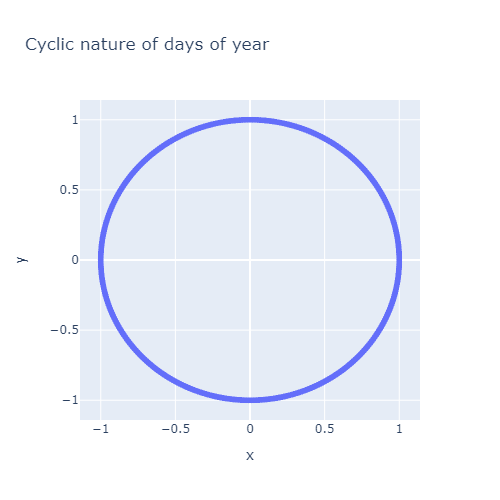

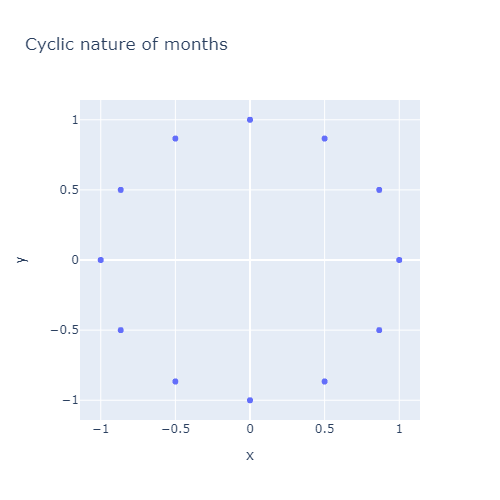

In [483]:
fig = px.scatter(x = well1_x_train['day_sin'], y = well1_x_train['day_cos'], width = 500, title='Cyclic nature of days of year')
fig.show()
fig = px.scatter(x = well1_x_train['month_sin'], y = well1_x_train['month_cos'], width = 500, title='Cyclic nature of months')
fig.show()

## Model Building for well NO 15/9-F-14 H || 5351

In [484]:
def objective(trial):
    params_xgb = {
        'eta': trial.suggest_float('eta', 1e-3, 1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-2, 150, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        # 'min_child_weight': trial.suggest('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-2, 1, log = True),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 1e-2, 1, log = True),
        'lambda': trial.suggest_float('lambda', 1e-1, 20, log = True),
        'alpha': trial.suggest_float('alpha', 1e-1, 20, log = True),

    }

    xgb = XGBRegressor(**params_xgb, verbosity = 0, seed = seed, n_jobs = -1)
    
    xgb.fit(well1_x_train, well1_y_train)
    xgb_pred = xgb.predict(well1_x_test)

    r2 = r2_score(well1_y_test, xgb_pred)

    return r2

In [485]:
study = optuna.create_study(direction='maximize')

study.optimize(objective,
               n_trials = 200,
               n_jobs = -1,
               show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [486]:
study.best_params

{'eta': 0.13651117365722956,
 'gamma': 139.0921756024425,
 'max_depth': 6,
 'colsample_bytree': 0.6040986545199711,
 'colsample_bylevel': 0.9994855830814056,
 'lambda': 0.1612962888487533,
 'alpha': 1.131808048263066}

In [487]:
study.best_value

0.9868805408477783

In [488]:
best_xgb_well1 = XGBRegressor(**study.best_params, verbosity = 0, seed = seed, n_jobs = -1)
joblib.dump(best_xgb_well1, 'models/Well1XGB.sav')

['models/Well1XGB.sav']

## Analysis for well NO 15/9-F-12 H || 5599

In [489]:
data_well2.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
1911 2008-02-12  NO 15/9-F-12 H                5599          15/9-F-12   
1912 2008-02-13  NO 15/9-F-12 H                5599          15/9-F-12   
1913 2008-02-14  NO 15/9-F-12 H                5599          15/9-F-12   
1914 2008-02-15  NO 15/9-F-12 H                5599          15/9-F-12   
1915 2008-02-16  NO 15/9-F-12 H                5599          15/9-F-12   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
1911         3420717          VOLVE             369304    MÆRSK INSPIRER   
1912         3420717          VOLVE             369304    MÆRSK INSPIRER   
1913         3420717          VOLVE             369304    MÆRSK INSPIRER   
1914         3420717          VOLVE             369304    MÆRSK INSPIRER   
1915         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
1911          11.50             308.055940                104.418090   
1912          24.00             303.033518                105.402696   
1913          22.50             295.586061                105.775486   
1914          23.15             297.662702                105.751875   
1915          24.00             295.935519                105.811114   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
1911     201.250000          18.639557         14.484431             %   
1912     182.144942          16.466641         22.832986             %   
1913     181.867887          12.659589         31.249966             %   
1914     180.832060           5.264052         28.518930             %   
1915     180.501045          12.384634         30.227902             %   

       AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
1911  106.805939  16.294718      92.475107        284.65      38888.67   
1912  120.888576  53.374330      89.620148       1869.70     285246.16   
1913  113.718175  72.737631      80.120465       3124.09     509954.88   
1914  116.830642  69.995943      84.250990       2608.28     383426.67   
1915  115.434474  71.518347      82.359026       3051.80     418474.00   

      BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
1911        385.01          NaN  production        OP  
1912          7.13          NaN  production        OP  
1913          1.16          NaN  production        OP  
1914          0.97          NaN  production        OP  
1915          4.89          NaN  production        OP

In [490]:
print(data_well2.shape, data_well2.size)

(3056, 24) 73344


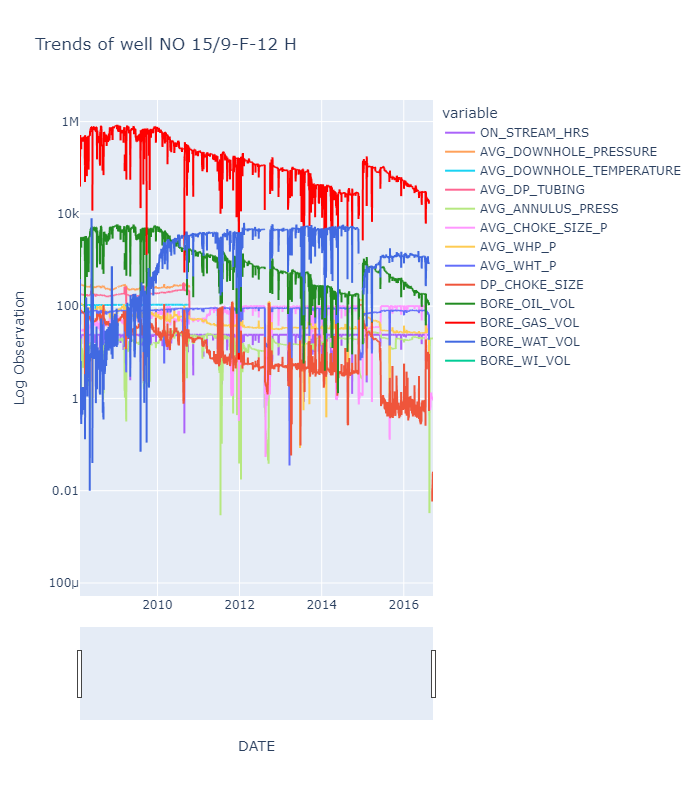

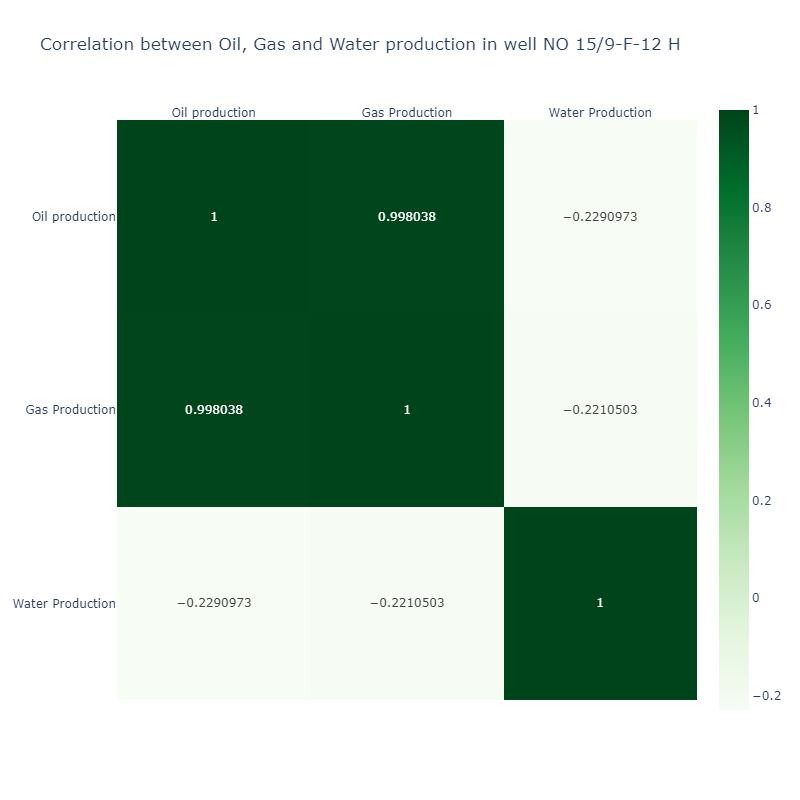

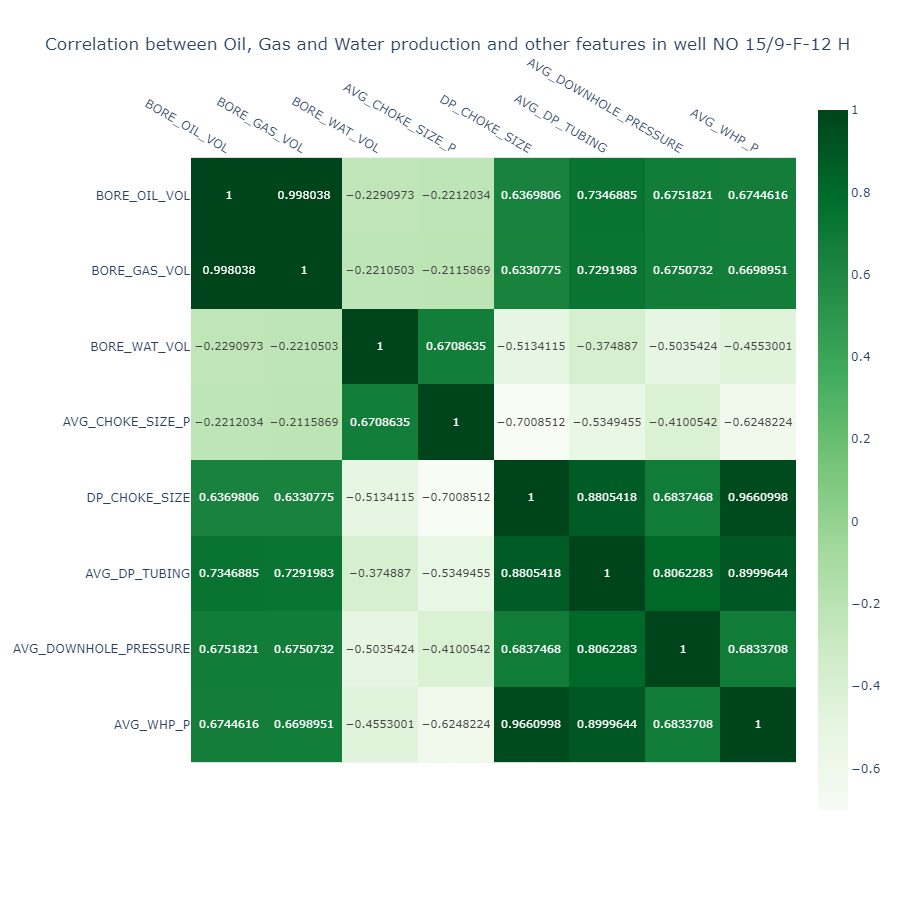

In [491]:
plot(data_well2)

In [492]:
data_well2.nunique()

DATEPRD                     3056
WELL_BORE_CODE                 1
NPD_WELL_BORE_CODE             1
NPD_WELL_BORE_NAME             1
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                275
AVG_DOWNHOLE_PRESSURE        948
AVG_DOWNHOLE_TEMPERATURE     948
AVG_DP_TUBING               3002
AVG_ANNULUS_PRESS           2987
AVG_CHOKE_SIZE_P            2218
AVG_CHOKE_UOM                  1
AVG_WHP_P                   3007
AVG_WHT_P                   3007
DP_CHOKE_SIZE               3019
BORE_OIL_VOL                2807
BORE_GAS_VOL                2836
BORE_WAT_VOL                2709
BORE_WI_VOL                    0
FLOW_KIND                      1
WELL_TYPE                      1
dtype: int64

In [493]:
data_well2.isna().mean().round(4) * 100

DATEPRD                       0.00
WELL_BORE_CODE                0.00
NPD_WELL_BORE_CODE            0.00
NPD_WELL_BORE_NAME            0.00
NPD_FIELD_CODE                0.00
NPD_FIELD_NAME                0.00
NPD_FACILITY_CODE             0.00
NPD_FACILITY_NAME             0.00
ON_STREAM_HRS                 0.00
AVG_DOWNHOLE_PRESSURE         0.20
AVG_DOWNHOLE_TEMPERATURE      0.20
AVG_DP_TUBING                 0.20
AVG_ANNULUS_PRESS             0.43
AVG_CHOKE_SIZE_P              1.44
AVG_CHOKE_UOM                 0.00
AVG_WHP_P                     0.00
AVG_WHT_P                     0.00
DP_CHOKE_SIZE                 0.00
BORE_OIL_VOL                  0.00
BORE_GAS_VOL                  0.00
BORE_WAT_VOL                  0.00
BORE_WI_VOL                 100.00
FLOW_KIND                     0.00
WELL_TYPE                     0.00
dtype: float64

In [494]:
well2_x_train, well2_x_test, well2_y_train, well2_y_test = process(data_well2)

In [495]:
well2_x_train.head()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
3335       0.385737              -0.667117                 -0.669545   
2052       0.385737               1.506383                  1.489526   
3461       0.385737              -0.667117                 -0.669545   
4222       0.385737              -0.667117                 -0.669545   
4320      -3.105349              -0.667117                 -0.669545   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  \
3335      -0.683642          -0.832699          1.011986  -0.539712   
2052       1.316249          -0.499203         -0.844131   1.379996   
3461      -0.697445          -1.001166          1.011986  -0.580676   
4222      -0.712244           0.418945          1.011986  -0.624593   
4320       0.727633          -2.212258         -2.201439   3.648437   

      AVG_WHT_P  DP_CHOKE_SIZE  missingindicator_AVG_DOWNHOLE_PRESSURE  \
3335   0.616901      -0.595052                               -0.040489   
2052   0.065115       1.277449                               -0.040489   
3461   0.634211      -0.634894                               -0.040489   
4222   0.616585      -0.690423                               -0.040489   
4320  -3.563475       3.835976                               -0.040489   

      missingindicator_AVG_DOWNHOLE_TEMPERATURE  \
3335                                  -0.040489   
2052                                  -0.040489   
3461                                  -0.040489   
4222                                  -0.040489   
4320                                  -0.040489   

      missingindicator_AVG_DP_TUBING  missingindicator_AVG_ANNULUS_PRESS  \
3335                       -0.040489                           -0.060796   
2052                       -0.040489                           -0.060796   
3461                       -0.040489                           -0.060796   
4222                       -0.040489                           -0.060796   
4320                       -0.040489                           -0.060796   

      missingindicator_AVG_CHOKE_SIZE_P   day_sin   day_cos     month_sin  \
3335                          -0.118777  0.849817  0.527078  8.660254e-01   
2052                          -0.118777 -0.043022 -0.999074 -5.000000e-01   
3461                          -0.118777 -0.043022 -0.999074 -5.000000e-01   
4222                          -0.118777 -0.895839 -0.444378 -1.000000e+00   
4320                          -0.118777 -0.337523  0.941317 -2.449294e-16   

         month_cos  
3335  5.000000e-01  
2052 -8.660254e-01  
3461 -8.660254e-01  
4222 -1.836970e-16  
4320  1.000000e+00

## Model building for well NO 15/9-F-12 H || 5599

In [496]:
def objective(trial):
    params_xgb = {
        'eta': trial.suggest_float('eta', 1e-3, 1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-2, 150, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        # 'min_child_weight': trial.suggest('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-2, 1, log = True),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 1e-2, 1, log = True),
        'lambda': trial.suggest_float('lambda', 1e-1, 20, log = True),
        'alpha': trial.suggest_float('alpha', 1e-1, 20, log = True),

    }

    xgb = XGBRegressor(**params_xgb, verbosity = 0, seed = seed, n_jobs = -1)
    
    xgb.fit(well2_x_train, well2_y_train)
    xgb_pred = xgb.predict(well2_x_test)

    r2 = r2_score(well2_y_test, xgb_pred)

    return r2

In [497]:
study = optuna.create_study(direction='maximize')

study.optimize(objective,
               n_trials = 200,
               n_jobs = -1,
               show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [498]:
study.best_params

{'eta': 0.22723401259548906,
 'gamma': 0.05651130001920514,
 'max_depth': 6,
 'colsample_bytree': 0.5685219004048123,
 'colsample_bylevel': 0.017131146007102138,
 'lambda': 1.374848500312383,
 'alpha': 0.2299256374953041}

In [499]:
study.best_value

0.9837448000907898

In [500]:
best_xgb_well2 = XGBRegressor(**study.best_params, verbosity = 0, seed = seed, n_jobs = -1)
joblib.dump(best_xgb_well2, 'models/Well2XGB.sav')

['models/Well2XGB.sav']

## Analysis for well NO 15/9-F-4 AH	|| 5693

In [501]:
data_well3.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
9001 2007-09-01  NO 15/9-F-4 AH                5693           15/9-F-4   
9002 2007-09-02  NO 15/9-F-4 AH                5693           15/9-F-4   
9003 2007-09-03  NO 15/9-F-4 AH                5693           15/9-F-4   
9004 2007-09-04  NO 15/9-F-4 AH                5693           15/9-F-4   
9005 2007-09-05  NO 15/9-F-4 AH                5693           15/9-F-4   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
9001         3420717          VOLVE             369304    MÆRSK INSPIRER   
9002         3420717          VOLVE             369304    MÆRSK INSPIRER   
9003         3420717          VOLVE             369304    MÆRSK INSPIRER   
9004         3420717          VOLVE             369304    MÆRSK INSPIRER   
9005         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
9001            NaN                    NaN                       NaN   
9002            NaN                    NaN                       NaN   
9003            NaN                    NaN                       NaN   
9004            NaN                    NaN                       NaN   
9005            NaN                    NaN                       NaN   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
9001            NaN                NaN               NaN           NaN   
9002            NaN                NaN               NaN           NaN   
9003            NaN                NaN               NaN           NaN   
9004            NaN                NaN               NaN           NaN   
9005            NaN                NaN               NaN           NaN   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
9001        NaN        NaN            NaN           NaN           NaN   
9002        NaN        NaN            NaN           NaN           NaN   
9003        NaN        NaN            NaN           NaN           NaN   
9004        NaN        NaN            NaN           NaN           NaN   
9005        NaN        NaN            NaN           NaN           NaN   

      BORE_WAT_VOL  BORE_WI_VOL  FLOW_KIND WELL_TYPE  
9001           NaN          NaN  injection        WI  
9002           NaN          NaN  injection        WI  
9003           NaN          NaN  injection        WI  
9004           NaN          NaN  injection        WI  
9005           NaN          NaN  injection        WI

In [502]:
print(data_well3.shape, data_well3.size)

(3327, 24) 79848


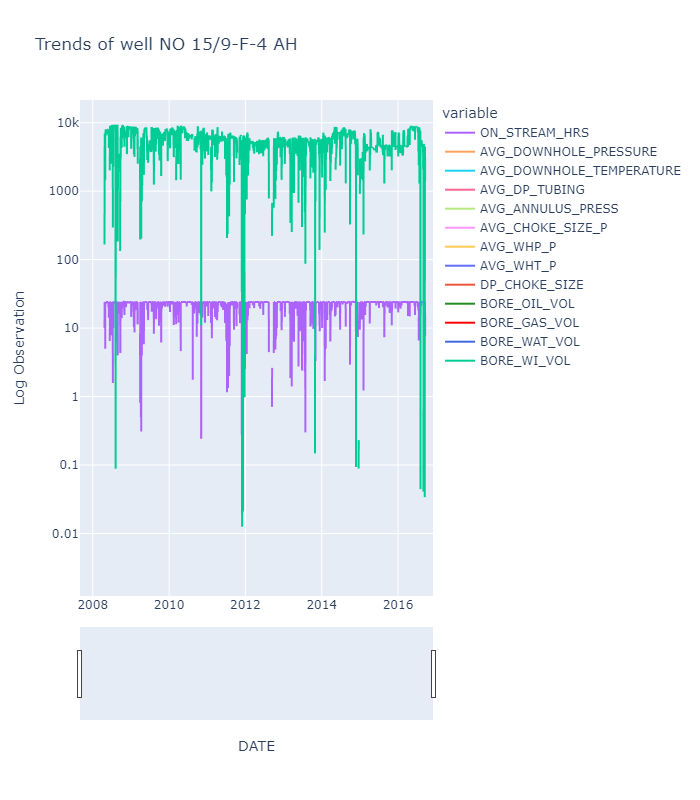

ValueError: Transform failed with error code 525: plotly.js error

In [504]:
plot(data_well3)

In [ ]:
data_well3.nunique()

DATEPRD                     3327
WELL_BORE_CODE                 1
NPD_WELL_BORE_CODE             1
NPD_WELL_BORE_NAME             1
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                354
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS              0
AVG_CHOKE_SIZE_P               0
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  1
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 2795
FLOW_KIND                      1
WELL_TYPE                      1
dtype: int64

In [ ]:
data_well3.isna().mean().round(4) * 100

DATEPRD                       0.00
WELL_BORE_CODE                0.00
NPD_WELL_BORE_CODE            0.00
NPD_WELL_BORE_NAME            0.00
NPD_FIELD_CODE                0.00
NPD_FIELD_NAME                0.00
NPD_FACILITY_CODE             0.00
NPD_FACILITY_NAME             0.00
ON_STREAM_HRS                 4.57
AVG_DOWNHOLE_PRESSURE       100.00
AVG_DOWNHOLE_TEMPERATURE    100.00
AVG_DP_TUBING               100.00
AVG_ANNULUS_PRESS           100.00
AVG_CHOKE_SIZE_P            100.00
AVG_CHOKE_UOM               100.00
AVG_WHP_P                   100.00
AVG_WHT_P                   100.00
DP_CHOKE_SIZE                 4.63
BORE_OIL_VOL                100.00
BORE_GAS_VOL                100.00
BORE_WAT_VOL                100.00
BORE_WI_VOL                  10.13
FLOW_KIND                     0.00
WELL_TYPE                     0.00
dtype: float64

### Well 3 is a Water Injection well. Hence, we shall not build a predictive model for this well.

## Analysis for well NO 15/9-F-5 AH	|| 5769

In [ ]:
data_well4.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
12328 2007-09-01  NO 15/9-F-5 AH                5769           15/9-F-5   
12329 2007-09-02  NO 15/9-F-5 AH                5769           15/9-F-5   
12330 2007-09-03  NO 15/9-F-5 AH                5769           15/9-F-5   
12331 2007-09-04  NO 15/9-F-5 AH                5769           15/9-F-5   
12332 2007-09-05  NO 15/9-F-5 AH                5769           15/9-F-5   

       NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
12328         3420717          VOLVE             369304    MÆRSK INSPIRER   
12329         3420717          VOLVE             369304    MÆRSK INSPIRER   
12330         3420717          VOLVE             369304    MÆRSK INSPIRER   
12331         3420717          VOLVE             369304    MÆRSK INSPIRER   
12332         3420717          VOLVE             369304    MÆRSK INSPIRER   

       ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
12328            NaN                    NaN                       NaN   
12329            NaN                    NaN                       NaN   
12330            NaN                    NaN                       NaN   
12331            NaN                    NaN                       NaN   
12332            NaN                    NaN                       NaN   

       AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
12328            NaN                NaN               NaN           NaN   
12329            NaN                NaN               NaN           NaN   
12330            NaN                NaN               NaN           NaN   
12331            NaN                NaN               NaN           NaN   
12332            NaN                NaN               NaN           NaN   

       AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
12328        NaN        NaN            NaN           NaN           NaN   
12329        NaN        NaN            NaN           NaN           NaN   
12330        NaN        NaN            NaN           NaN           NaN   
12331        NaN        NaN            NaN           NaN           NaN   
12332        NaN        NaN            NaN           NaN           NaN   

       BORE_WAT_VOL  BORE_WI_VOL  FLOW_KIND WELL_TYPE  
12328           NaN          NaN  injection        WI  
12329           NaN          NaN  injection        WI  
12330           NaN          NaN  injection        WI  
12331           NaN          NaN  injection        WI  
12332           NaN          NaN  injection        WI

In [ ]:
print(data_well4.shape, data_well4.size)

(3306, 24) 79344


In [ ]:
plot(data_well4)

In [ ]:
data_well4.nunique()

DATEPRD                     3306
WELL_BORE_CODE                 1
NPD_WELL_BORE_CODE             1
NPD_WELL_BORE_NAME             1
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                338
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS            157
AVG_CHOKE_SIZE_P             127
AVG_CHOKE_UOM                  1
AVG_WHP_P                    154
AVG_WHT_P                    146
DP_CHOKE_SIZE                152
BORE_OIL_VOL                 129
BORE_GAS_VOL                 130
BORE_WAT_VOL                 123
BORE_WI_VOL                 2523
FLOW_KIND                      2
WELL_TYPE                      2
dtype: int64

In [ ]:
data_well4.isna().mean().round(4) * 100

DATEPRD                       0.00
WELL_BORE_CODE                0.00
NPD_WELL_BORE_CODE            0.00
NPD_WELL_BORE_NAME            0.00
NPD_FIELD_CODE                0.00
NPD_FIELD_NAME                0.00
NPD_FACILITY_CODE             0.00
NPD_FACILITY_NAME             0.00
ON_STREAM_HRS                 4.02
AVG_DOWNHOLE_PRESSURE       100.00
AVG_DOWNHOLE_TEMPERATURE    100.00
AVG_DP_TUBING               100.00
AVG_ANNULUS_PRESS            95.16
AVG_CHOKE_SIZE_P             95.16
AVG_CHOKE_UOM                95.16
AVG_WHP_P                    95.16
AVG_WHT_P                    95.43
DP_CHOKE_SIZE                 4.05
BORE_OIL_VOL                 95.16
BORE_GAS_VOL                 95.16
BORE_WAT_VOL                 95.16
BORE_WI_VOL                  17.85
FLOW_KIND                     0.00
WELL_TYPE                     0.00
dtype: float64

### Since well 4 is also a water injection well, we will not build a predictive model for this well either.

## Analysis for well NO 15/9-F-11 H	|| 7078

In [ ]:
data_well5.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
746 2013-07-08  NO 15/9-F-11 H                7078          15/9-F-11   
747 2013-07-09  NO 15/9-F-11 H                7078          15/9-F-11   
748 2013-07-10  NO 15/9-F-11 H                7078          15/9-F-11   
749 2013-07-11  NO 15/9-F-11 H                7078          15/9-F-11   
750 2013-07-12  NO 15/9-F-11 H                7078          15/9-F-11   

     NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
746         3420717          VOLVE             369304    MÆRSK INSPIRER   
747         3420717          VOLVE             369304    MÆRSK INSPIRER   
748         3420717          VOLVE             369304    MÆRSK INSPIRER   
749         3420717          VOLVE             369304    MÆRSK INSPIRER   
750         3420717          VOLVE             369304    MÆRSK INSPIRER   

     ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
746            0.0                    0.0                       0.0   
747            0.0                    0.0                       0.0   
748            0.0                    NaN                       NaN   
749            0.0                    0.0                       0.0   
750            0.0                    NaN                       NaN   

     AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
746            0.0                0.0               0.0             %   
747            0.0                0.0               0.0             %   
748            NaN                NaN               NaN             %   
749            0.0                0.0               0.0             %   
750            NaN                NaN               NaN             %   

     AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
746        0.0        0.0            0.0           0.0           0.0   
747        0.0        0.0            0.0           0.0           0.0   
748        NaN        NaN            NaN           0.0           0.0   
749        0.0        0.0            0.0           0.0           0.0   
750        NaN        NaN            NaN           0.0           0.0   

     BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
746           0.0          NaN  production        OP  
747           0.0          NaN  production        OP  
748           0.0          NaN  production        OP  
749           0.0          NaN  production        OP  
750           0.0          NaN  production        OP

In [ ]:
print(data_well5.shape, data_well5.size)

(1165, 24) 27960


In [ ]:
plot(data_well5)

In [ ]:
data_well5.nunique()

DATEPRD                     1165
WELL_BORE_CODE                 1
NPD_WELL_BORE_CODE             1
NPD_WELL_BORE_NAME             1
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                105
AVG_DOWNHOLE_PRESSURE       1140
AVG_DOWNHOLE_TEMPERATURE    1138
AVG_DP_TUBING               1140
AVG_ANNULUS_PRESS           1125
AVG_CHOKE_SIZE_P             893
AVG_CHOKE_UOM                  1
AVG_WHP_P                   1140
AVG_WHT_P                   1140
DP_CHOKE_SIZE               1140
BORE_OIL_VOL                1115
BORE_GAS_VOL                1124
BORE_WAT_VOL                1095
BORE_WI_VOL                    0
FLOW_KIND                      1
WELL_TYPE                      1
dtype: int64

In [ ]:
data_well5.isna().mean().round(4) * 100

DATEPRD                       0.00
WELL_BORE_CODE                0.00
NPD_WELL_BORE_CODE            0.00
NPD_WELL_BORE_NAME            0.00
NPD_FIELD_CODE                0.00
NPD_FIELD_NAME                0.00
NPD_FACILITY_CODE             0.00
NPD_FACILITY_NAME             0.00
ON_STREAM_HRS                 0.00
AVG_DOWNHOLE_PRESSURE         0.52
AVG_DOWNHOLE_TEMPERATURE      0.52
AVG_DP_TUBING                 0.52
AVG_ANNULUS_PRESS             0.52
AVG_CHOKE_SIZE_P              0.17
AVG_CHOKE_UOM                 0.00
AVG_WHP_P                     0.52
AVG_WHT_P                     0.52
DP_CHOKE_SIZE                 0.52
BORE_OIL_VOL                  0.00
BORE_GAS_VOL                  0.00
BORE_WAT_VOL                  0.00
BORE_WI_VOL                 100.00
FLOW_KIND                     0.00
WELL_TYPE                     0.00
dtype: float64

## Model building for well NO 15/9-F-11 H	|| 7078

In [ ]:
well5_x_train, well5_x_test, well5_y_train, well5_y_test = process(data_well5)

In [ ]:
well5_x_train.head()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
1269       24.00000             282.144272                104.982246   
1041       24.00000             229.856974                106.513077   
1662       23.33333             231.579902                105.838681   
1597       24.00000             220.683891                106.194720   
843        24.00000             254.656586                106.028837   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  \
1269     201.513640          17.047512          4.491673  80.630632   
1041     164.314503          29.215186         12.522529  65.542472   
1662     198.673272          14.634873         81.804332  32.906630   
1597     189.096235          11.099742         99.960426  31.587656   
843      172.526769          16.187971         10.452423  82.129817   

      AVG_WHT_P  DP_CHOKE_SIZE  missingindicator_AVG_DOWNHOLE_PRESSURE  \
1269  45.492610      51.320427                                     0.0   
1041  67.745277      36.729949                                     0.0   
1662  80.175531       6.146725                                     0.0   
1597  78.592181       4.678820                                     0.0   
843   62.443494      53.399354                                     0.0   

      missingindicator_AVG_DOWNHOLE_TEMPERATURE  \
1269                                        0.0   
1041                                        0.0   
1662                                        0.0   
1597                                        0.0   
843                                         0.0   

      missingindicator_AVG_DP_TUBING  missingindicator_AVG_ANNULUS_PRESS  \
1269                             0.0                                 0.0   
1041                             0.0                                 0.0   
1662                             0.0                                 0.0   
1597                             0.0                                 0.0   
843                              0.0                                 0.0   

      missingindicator_AVG_CHOKE_SIZE_P  missingindicator_AVG_WHP_P  \
1269                                0.0                         0.0   
1041                                0.0                         0.0   
1662                                0.0                         0.0   
1597                                0.0                         0.0   
843                                 0.0                         0.0   

      missingindicator_AVG_WHT_P  missingindicator_DP_CHOKE_SIZE   day_sin  \
1269                         0.0                             0.0 -0.255353   
1041                         0.0                             0.0  0.863142   
1662                         0.0                             0.0  0.221922   
1597                         0.0                             0.0 -0.780296   
843                          0.0                             0.0 -0.974100   

       day_cos     month_sin  month_cos  
1269  0.966848 -2.449294e-16   1.000000  
1041 -0.504961  5.000000e-01  -0.866025  
1662  0.975065  5.000000e-01   0.866025  
1597  0.625411 -5.000000e-01   0.866025  
843   0.226116 -8.660254e-01   0.500000

In [ ]:
def objective(trial):
    params_xgb = {
        'eta': trial.suggest_float('eta', 1e-3, 1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-2, 150, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        # 'min_child_weight': trial.suggest('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-2, 1, log = True),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 1e-2, 1, log = True),
        'lambda': trial.suggest_float('lambda', 1e-1, 20, log = True),
        'alpha': trial.suggest_float('alpha', 1e-1, 20, log = True),

    }

    xgb = XGBRegressor(**params_xgb, verbosity = 0, seed = seed, n_jobs = -1)
    
    xgb.fit(well5_x_train, well5_y_train)
    xgb_pred = xgb.predict(well5_x_test)

    r2 = r2_score(well5_y_test, xgb_pred)

    return r2

In [ ]:
study = optuna.create_study(direction='maximize')

study.optimize(objective,
               n_trials = 200,
               n_jobs = -1,
               show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
study.best_params

{'eta': 0.1770718140560206,
 'gamma': 4.547372733316948,
 'max_depth': 6,
 'colsample_bytree': 0.9776123390290711,
 'colsample_bylevel': 0.6852028014928488,
 'lambda': 1.0212337431503198,
 'alpha': 0.36522076884053195}

In [ ]:
study.best_value

0.9905292987823486

In [ ]:
best_xgb_well5 = XGBRegressor(**study.best_params, verbosity = 0, seed = seed, n_jobs = -1)
joblib.dump(best_xgb_well5, 'models/Well5XGB.sav')

['models/Well5XGB.sav']

## Analysis for well NO 15/9-F-15 D	|| 7289

In [ ]:
data_well6.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
8023 2014-01-12  NO 15/9-F-15 D                7289        15/9-F-15 D   
8024 2014-01-13  NO 15/9-F-15 D                7289        15/9-F-15 D   
8025 2014-01-14  NO 15/9-F-15 D                7289        15/9-F-15 D   
8026 2014-01-15  NO 15/9-F-15 D                7289        15/9-F-15 D   
8027 2014-01-16  NO 15/9-F-15 D                7289        15/9-F-15 D   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
8023         3420717          VOLVE             369304    MÆRSK INSPIRER   
8024         3420717          VOLVE             369304    MÆRSK INSPIRER   
8025         3420717          VOLVE             369304    MÆRSK INSPIRER   
8026         3420717          VOLVE             369304    MÆRSK INSPIRER   
8027         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
8023            0.0             303.747100                 98.701230   
8024            0.0             303.955410                 98.733830   
8025            0.0             303.377050                 98.791770   
8026            0.0             304.405040                 98.102420   
8027           24.0             241.770858                104.898944   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
8023     283.534860            0.00000          1.181753             %   
8024     280.695050            0.00000          1.197065             %   
8025     282.029910            0.00000          1.125136             %   
8026     272.529550            0.58579          2.610212             %   
8027     185.900111           19.05713          8.660590             %   

      AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
8023  20.212240   8.395740      20.146020          0.00           0.0   
8024  23.260360   6.327640      23.189020          0.00           0.0   
8025  21.347140   6.829930      21.274680          0.00           0.0   
8026  31.875490   7.686810      27.094350          0.00           0.0   
8027  55.870746  16.900088      27.966259        351.05       52394.9   

      BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
8023           0.0          NaN  production        OP  
8024           0.0          NaN  production        OP  
8025           0.0          NaN  production        OP  
8026           0.0          NaN  production        OP  
8027           0.0          NaN  production        OP

In [ ]:
print(data_well6.shape, data_well6.size)

(978, 24) 23472


In [ ]:
plot(data_well6)

In [ ]:
data_well6.nunique()

DATEPRD                     978
WELL_BORE_CODE                1
NPD_WELL_BORE_CODE            1
NPD_WELL_BORE_NAME            1
NPD_FIELD_CODE                1
NPD_FIELD_NAME                1
NPD_FACILITY_CODE             1
NPD_FACILITY_NAME             1
ON_STREAM_HRS                72
AVG_DOWNHOLE_PRESSURE       908
AVG_DOWNHOLE_TEMPERATURE    908
AVG_DP_TUBING               908
AVG_ANNULUS_PRESS           897
AVG_CHOKE_SIZE_P            950
AVG_CHOKE_UOM                 1
AVG_WHP_P                   906
AVG_WHT_P                   906
DP_CHOKE_SIZE               973
BORE_OIL_VOL                751
BORE_GAS_VOL                768
BORE_WAT_VOL                464
BORE_WI_VOL                   0
FLOW_KIND                     1
WELL_TYPE                     1
dtype: int64

In [ ]:
data_well6.isna().mean().round(4) * 100

DATEPRD                       0.0
WELL_BORE_CODE                0.0
NPD_WELL_BORE_CODE            0.0
NPD_WELL_BORE_NAME            0.0
NPD_FIELD_CODE                0.0
NPD_FIELD_NAME                0.0
NPD_FACILITY_CODE             0.0
NPD_FACILITY_NAME             0.0
ON_STREAM_HRS                 0.0
AVG_DOWNHOLE_PRESSURE         0.0
AVG_DOWNHOLE_TEMPERATURE      0.0
AVG_DP_TUBING                 0.0
AVG_ANNULUS_PRESS             0.0
AVG_CHOKE_SIZE_P              0.0
AVG_CHOKE_UOM                 0.0
AVG_WHP_P                     0.0
AVG_WHT_P                     0.0
DP_CHOKE_SIZE                 0.0
BORE_OIL_VOL                  0.0
BORE_GAS_VOL                  0.0
BORE_WAT_VOL                  0.0
BORE_WI_VOL                 100.0
FLOW_KIND                     0.0
WELL_TYPE                     0.0
dtype: float64

## Model building for NO 15/9-F-15 D || 7289

In [ ]:
well6_x_train, well6_x_test, well6_y_train, well6_y_test = process(data_well6)

In [ ]:
well6_x_train.head()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
8374          0.000             305.916040                101.502570   
8306         23.000             201.056617                106.628591   
8254          9.125             257.040434                103.574034   
8439         24.000             200.495280                106.422083   
8403         24.000             199.953458                106.535148   

      AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P   AVG_WHP_P  \
8374     187.788770           8.272160          0.535515  118.127270   
8306     160.097182          15.866025         10.536827   40.959435   
8254     181.134691           2.815385          3.951114   75.905743   
8439     166.833690          15.363171         10.515878   33.661590   
8403     163.905534          10.275778         10.775885   36.047923   

      AVG_WHT_P  DP_CHOKE_SIZE       day_sin   day_cos     month_sin  \
8374  10.031730      88.687730  6.432491e-16  1.000000 -2.449294e-16   
8306  31.201254      12.449689 -9.209713e-01  0.389630 -8.660254e-01   
8254  24.506926      38.203890 -8.800122e-01 -0.474951 -1.000000e+00   
8439  27.709675       5.078186  8.996309e-01  0.436651  1.000000e+00   
8403  26.743183       6.609016  4.787338e-01  0.877960  5.000000e-01   

         month_cos  
8374  1.000000e+00  
8306  5.000000e-01  
8254 -1.836970e-16  
8439  6.123234e-17  
8403  8.660254e-01

In [ ]:
def objective(trial):
    params_xgb = {
        'eta': trial.suggest_float('eta', 1e-3, 1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-2, 150, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        # 'min_child_weight': trial.suggest('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-2, 1, log = True),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 1e-2, 1, log = True),
        'lambda': trial.suggest_float('lambda', 1e-1, 20, log = True),
        'alpha': trial.suggest_float('alpha', 1e-1, 20, log = True),

    }

    xgb = XGBRegressor(**params_xgb, verbosity = 0, seed = seed, n_jobs = -1)
    
    xgb.fit(well6_x_train, well6_y_train)
    xgb_pred = xgb.predict(well6_x_test)

    r2 = r2_score(well6_y_test, xgb_pred)

    return r2

In [ ]:
study = optuna.create_study(direction='maximize')

study.optimize(objective,
               n_trials = 200,
               n_jobs = -1,
               show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
study.best_params

{'eta': 0.24760801039810715,
 'gamma': 62.07563172641869,
 'max_depth': 6,
 'colsample_bytree': 0.4888953257370352,
 'colsample_bylevel': 0.1703955647764313,
 'lambda': 10.738841279437924,
 'alpha': 1.5087137458533881}

In [ ]:
study.best_value

0.9556099772453308

In [ ]:
best_xgb_well6 = XGBRegressor(**study.best_params, verbosity = 0, seed = seed, n_jobs = -1)
joblib.dump(best_xgb_well6, 'models/Well6XGB.sav')

['models/Well6XGB.sav']

## Analysis of well NO 15/9-F-1 C || 7405

In [ ]:
data_well7.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0            0.0                0.00000                   0.00000   
1            0.0                    NaN                       NaN   
2            0.0                    NaN                       NaN   
3            0.0                    NaN                       NaN   
4            0.0              310.37614                  96.87589   

   AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
0        0.00000                0.0          0.000000             %   
1            NaN                0.0          1.003059             %   
2            NaN                0.0          0.979008             %   
3            NaN                0.0          0.545759             %   
4      277.27826                0.0          1.215987             %   

   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
0    0.00000    0.00000        0.00000           0.0           0.0   
1    0.00000    0.00000        0.00000           0.0           0.0   
2    0.00000    0.00000        0.00000           0.0           0.0   
3    0.00000    0.00000        0.00000           0.0           0.0   
4   33.09788   10.47992       33.07195           0.0           0.0   

   BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE  
0           0.0          NaN  production        WI  
1           0.0          NaN  production        OP  
2           0.0          NaN  production        OP  
3           0.0          NaN  production        OP  
4           0.0          NaN  production        OP

In [ ]:
print(data_well7.shape, data_well7.size)

(746, 24) 17904


In [ ]:
data_well7.nunique()

DATEPRD                     746
WELL_BORE_CODE                1
NPD_WELL_BORE_CODE            1
NPD_WELL_BORE_NAME            1
NPD_FIELD_CODE                1
NPD_FIELD_NAME                1
NPD_FACILITY_CODE             1
NPD_FACILITY_NAME             1
ON_STREAM_HRS                52
AVG_DOWNHOLE_PRESSURE       737
AVG_DOWNHOLE_TEMPERATURE    737
AVG_DP_TUBING               737
AVG_ANNULUS_PRESS             1
AVG_CHOKE_SIZE_P            570
AVG_CHOKE_UOM                 1
AVG_WHP_P                   733
AVG_WHT_P                   736
DP_CHOKE_SIZE               736
BORE_OIL_VOL                429
BORE_GAS_VOL                431
BORE_WAT_VOL                399
BORE_WI_VOL                   0
FLOW_KIND                     1
WELL_TYPE                     2
dtype: int64

In [ ]:
data_well7.isna().mean().round(4) * 100

DATEPRD                       0.00
WELL_BORE_CODE                0.00
NPD_WELL_BORE_CODE            0.00
NPD_WELL_BORE_NAME            0.00
NPD_FIELD_CODE                0.00
NPD_FIELD_NAME                0.00
NPD_FACILITY_CODE             0.00
NPD_FACILITY_NAME             0.00
ON_STREAM_HRS                 0.00
AVG_DOWNHOLE_PRESSURE         0.40
AVG_DOWNHOLE_TEMPERATURE      0.40
AVG_DP_TUBING                 0.40
AVG_ANNULUS_PRESS            97.72
AVG_CHOKE_SIZE_P              0.00
AVG_CHOKE_UOM                 0.00
AVG_WHP_P                     0.00
AVG_WHT_P                     0.00
DP_CHOKE_SIZE                 0.00
BORE_OIL_VOL                  0.00
BORE_GAS_VOL                  0.00
BORE_WAT_VOL                  0.00
BORE_WI_VOL                 100.00
FLOW_KIND                     0.00
WELL_TYPE                     0.00
dtype: float64

## Model building for NO 15/9-F-1 C || 7405

In [ ]:
well7_x_train, well7_x_test, well7_y_train, well7_y_test = process(data_well7)

In [ ]:
well7_x_train.head()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
97            24.0             215.759037                108.134254   
612            0.0             220.544680                103.913670   
548            0.0             289.486340                100.673820   
511            0.0             296.510840                100.322020   
327            0.0             214.945340                104.493300   

     AVG_DP_TUBING  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
97      166.743107         46.800472   49.01593   57.20372      20.539875   
612     156.564240          0.000000   63.98044    9.69294      37.694620   
548     175.936670          0.000000  113.54967   13.66079      83.214580   
511     296.510840          0.091855    0.00000   15.40851      14.259160   
327     159.585780          0.000000   55.35956    7.75266      28.936090   

     missingindicator_AVG_DOWNHOLE_PRESSURE  \
97                                      0.0   
612                                     0.0   
548                                     0.0   
511                                     0.0   
327                                     0.0   

     missingindicator_AVG_DOWNHOLE_TEMPERATURE  \
97                                         0.0   
612                                        0.0   
548                                        0.0   
511                                        0.0   
327                                        0.0   

     missingindicator_AVG_DP_TUBING   day_sin   day_cos     month_sin  \
97                              0.0 -0.196673 -0.980469 -5.000000e-01   
612                             0.0 -0.353676  0.935368 -2.449294e-16   
548                             0.0 -0.994218  0.107381 -8.660254e-01   
511                             0.0 -0.863142 -0.504961 -8.660254e-01   
327                             0.0  0.849817  0.527078  8.660254e-01   

     month_cos  
97   -0.866025  
612   1.000000  
548   0.500000  
511  -0.500000  
327   0.500000

In [ ]:
def objective(trial):
    params_xgb = {
        'eta': trial.suggest_float('eta', 1e-3, 1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-2, 150, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        # 'min_child_weight': trial.suggest('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 1e-2, 1, log = True),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 1e-2, 1, log = True),
        'lambda': trial.suggest_float('lambda', 1e-1, 20, log = True),
        'alpha': trial.suggest_float('alpha', 1e-1, 20, log = True),

    }

    xgb = XGBRegressor(**params_xgb, verbosity = 0, seed = seed, n_jobs = -1)
    
    xgb.fit(well7_x_train, well7_y_train)
    xgb_pred = xgb.predict(well7_x_test)

    r2 = r2_score(well7_y_test, xgb_pred)

    return r2

In [ ]:
study = optuna.create_study(direction='maximize')

study.optimize(objective,
               n_trials = 200,
               n_jobs = -1,
               show_progress_bar=True)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
study.best_value

0.9811481833457947

In [ ]:
study.best_params

{'eta': 0.2394202624933079,
 'gamma': 0.2761227587344925,
 'max_depth': 4,
 'colsample_bytree': 0.9996836123970696,
 'colsample_bylevel': 0.4791389192045265,
 'lambda': 10.79767259437752,
 'alpha': 0.8798464698266695}

In [ ]:
best_xgb_well7 = XGBRegressor(**study.best_params, verbosity = 0, seed = seed, n_jobs = -1)
joblib.dump(best_xgb_well7, 'models/Well7XGB.sav')

['models/Well7XGB.sav']

## Generating scores dataframe

In [ ]:
well1_model = joblib.load('models/Well1XGB.sav')
well1_model.fit(well1_x_train, well1_y_train)

well1_r2 = r2_score(well1_y_test, well1_model.predict(well1_x_test))

well2_model = joblib.load('models/Well2XGB.sav')
well2_model.fit(well2_x_train, well2_y_train)

well2_r2 = r2_score(well2_y_test, well2_model.predict(well2_x_test))

well5_model = joblib.load('models/Well5XGB.sav')
well5_model.fit(well5_x_train, well5_y_train)

well5_r2 = r2_score(well5_y_test, well5_model.predict(well5_x_test))

well6_model = joblib.load('models/Well6XGB.sav')
well6_model.fit(well6_x_train, well6_y_train)

well6_r2 = r2_score(well6_y_test, well6_model.predict(well6_x_test))

well7_model = joblib.load('models/Well7XGB.sav')
well7_model.fit(well7_x_train, well7_y_train)

well7_r2 = r2_score(well7_y_test, well7_model.predict(well7_x_test))



In [ ]:
scores = pd.DataFrame({
    'Well Bore Code': ['NO 15/9-F-14 H', 'NO 15/9-F-12 H', 'NO 15/9-F-4 AH (INJ)', 'NO 15/9-F-5 AH (INJ)', 'NO 15/9-F-11 H', 'NO 15/9-F-15 D', 'NO 15/9-F-1 C'],
    'R2 Score': [well1_r2, well2_r2, -1, -1, well5_r2, well6_r2, well7_r2]
})

In [ ]:
scores

Well Bore Code  R2 Score
0        NO 15/9-F-14 H  0.987238
1        NO 15/9-F-12 H  0.987855
2  NO 15/9-F-4 AH (INJ) -1.000000
3  NO 15/9-F-5 AH (INJ) -1.000000
4        NO 15/9-F-11 H  0.990529
5        NO 15/9-F-15 D  0.955610
6         NO 15/9-F-1 C  0.981148

In [ ]:
fig = px.histogram(scores, 
                    y = 'R2 Score',
                    x = 'Well Bore Code', 
                    height = 800,
                    width = 800, 
                    color = 'Well Bore Code',
                    title = 'XGBoost R2 Scores for all wells',
                    color_discrete_map={
                        'NO 15/9-F-14 H': 'forestgreen',
                        'NO 15/9-F-12 H': 'forestgreen',
                        'NO 15/9-F-11 H': 'forestgreen',
                        'NO 15/9-F-15 D': 'forestgreen',
                        'NO 15/9-F-1 C': 'forestgreen',
                        'NO 15/9-F-4 AH (INJ)': 'royalblue',
                        'NO 15/9-F-5 AH (INJ)': 'royalblue',
                    })
fig.update_traces(marker_line_width = 1, marker_line_color = 'black')
fig.update_layout(yaxis_title='R2 Score')
fig.show()

### PCA for well NO 15/9-F-11 H

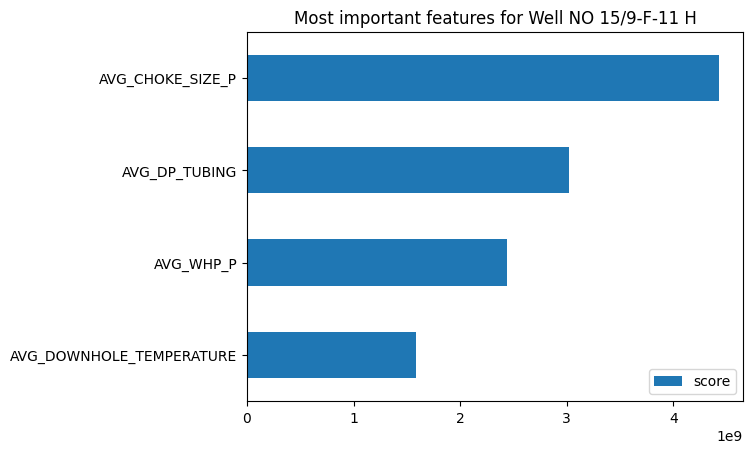

In [ ]:
xgb_feature_imp = well5_model.get_booster().get_score(importance_type = 'gain') # Getting feature importances returned by XGBoost, returns dict

keys = list(xgb_feature_imp.keys()) # Splitting column names as keys, changing data type from dicy_keys to list
values = list(xgb_feature_imp.values()) # Splitting values as values, changing data type from dict_values to list

xgb_feature_imp_df = pd.DataFrame(index = keys, # DataFrame containing feature importances of all features
                                  data = values, 
                                  columns=['score'])

xgb_imp_10 = xgb_feature_imp_df.nlargest(4, columns = ['score']) # Get 10 largest values in dataframe in descending order

xgb_imp_10.plot(kind='barh', 
                title='Most important features for Well NO 15/9-F-11 H').invert_yaxis()

### Conclusions and Insights

This project has provided a thorough analysis of the crude oil production data from the Volve field, offering valuable insights into production trends and future forecasts. Here are the key conclusions drawn from the analysis:

1. **Data Collection and Cleaning**:
   - Successfully gathered and preprocessed historical production data for the Volve field, ensuring the dataset was free of missing values and inconsistencies.

2. **Exploratory Data Analysis (EDA)**:
   - Conducted detailed EDA for each of the seven wells, revealing unique production patterns and trends.
   - Visualizations highlighted the production behaviors of both oil and water injector wells, helping in distinguishing their operational characteristics.

3. **Trend Analysis**:
   - Identified significant long-term trends in crude oil production, showcasing the lifecycle stages of the wells.
   - Highlighted the differences in production profiles between oil-producing wells and water injector wells.

4. **Predictive Modeling**:
   - Developed robust regression models using XGBoost to predict oil, water, and gas production for five out of seven wells.
   - Employed Optuna for hyperparameter tuning, enhancing the predictive accuracy of the models.
   - The models demonstrated strong predictive performance, indicating their utility for forecasting future production levels.

5. **Insights for the Industry**:
   - The analysis provides a comprehensive understanding of production dynamics in the Volve field.
   - The predictive models offer reliable forecasts, aiding in better resource planning and management.
   - The insights can inform decision-making processes in the energy sector, contributing to optimized production strategies and economic planning.

Overall, this project has successfully achieved its objectives, delivering actionable insights that can support stakeholders in the energy industry. By leveraging advanced data analysis and machine learning techniques, we have created a framework for continuous monitoring and forecasting of crude oil production, ensuring better preparedness for future production challenges.
